<a href="https://colab.research.google.com/github/Tusharshinde94/ASSIGNMENT-3-HYPOTHESIS-TESTING-BY-TUSHAR-SHINDE/blob/main/Supermarket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: import all essential for data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline


In [ ]:
# prompt: install pandaAI

!pip install panda-ai
from panda_ai import PandaAI
from panda_ai.llm import OpenAI

# Example usage (replace with your OpenAI API key)
panda = PandaAI(api_token="YOUR_OPENAI_API_KEY")
# Assuming you have a DataFrame called 'df'
# result = panda.run(df, prompt="What are the top 5 customers by revenue?")
# print(result)


In [12]:
# prompt: /supermarket_sales - Sheet1.csv from this path connect the data for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp


%matplotlib inline

# Load the dataframe.
try:
    df = pd.read_csv('/supermarket_sales - Sheet1.csv')
except FileNotFoundError:
    print("Error: '/supermarket_sales - Sheet1.csv' not found. Please ensure the file exists in the specified path.")
    df = pd.DataFrame() # Create an empty DataFrame to prevent further errors

# Example usage (replace with your OpenAI API key)
# If you want to use panda-ai, uncomment the following lines and replace "YOUR_OPENAI_API_KEY" with your actual key.

# panda = PandaAI(api_token="YOUR_OPENAI_API_KEY")
# result = panda.run(df, prompt="What are the top 5 customers by revenue?")
# print(result)

# Example using pandas directly (without panda-ai):
if not df.empty:
    print(df.head()) # Print first few rows of data for verification

    # Example analysis: Calculate total revenue
    total_revenue = df['Total'].sum()
    print(f"\nTotal revenue: {total_revenue}")

    # Example analysis: Calculate average rating
    average_rating = df['Rating'].mean()
    print(f"\nAverage rating: {average_rating}")

    # More analysis can be added here...

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

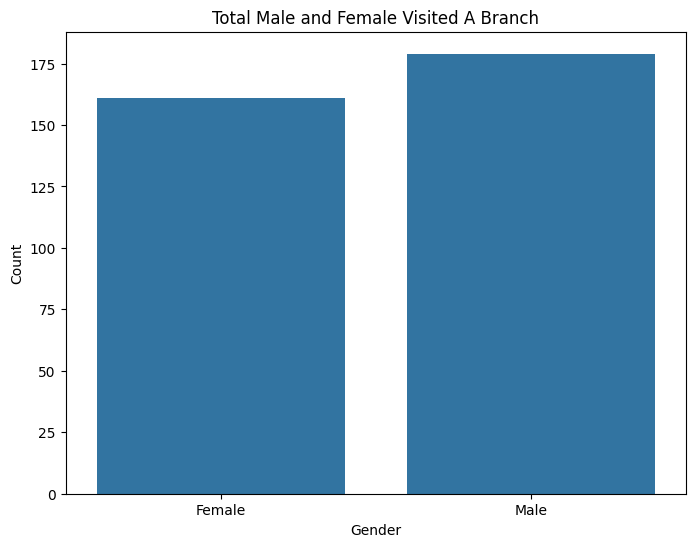

In [13]:
# prompt: Plot the bar graph for total male and female visited A Branch

if not df.empty:
    # Plotting the bar graph
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Gender', data=df[df['Branch'] == 'A'])
    plt.title('Total Male and Female Visited A Branch')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

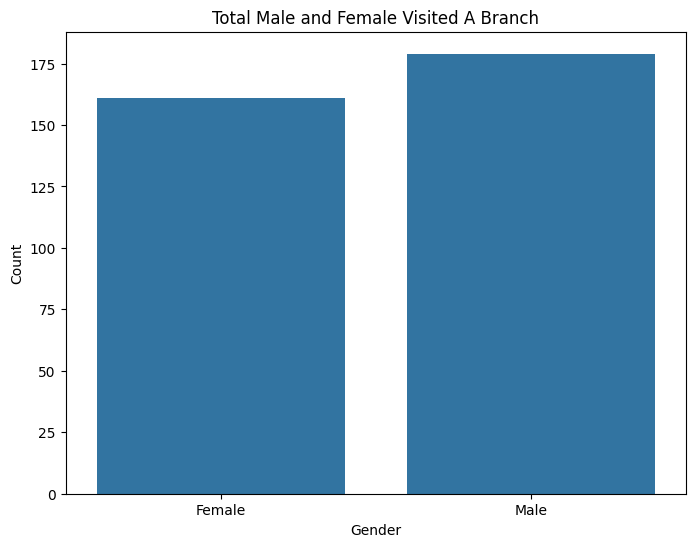

Gender counts for branch A:
Gender
Male      179
Female    161
Name: count, dtype: int64
--------------------


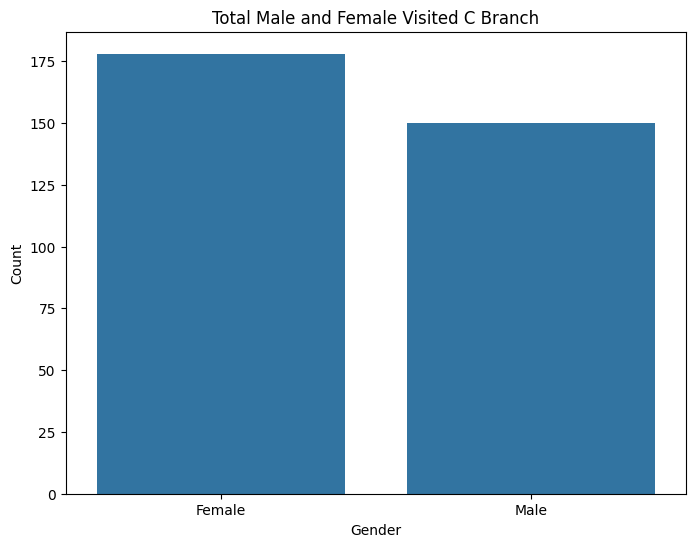

Gender counts for branch C:
Gender
Female    178
Male      150
Name: count, dtype: int64
--------------------


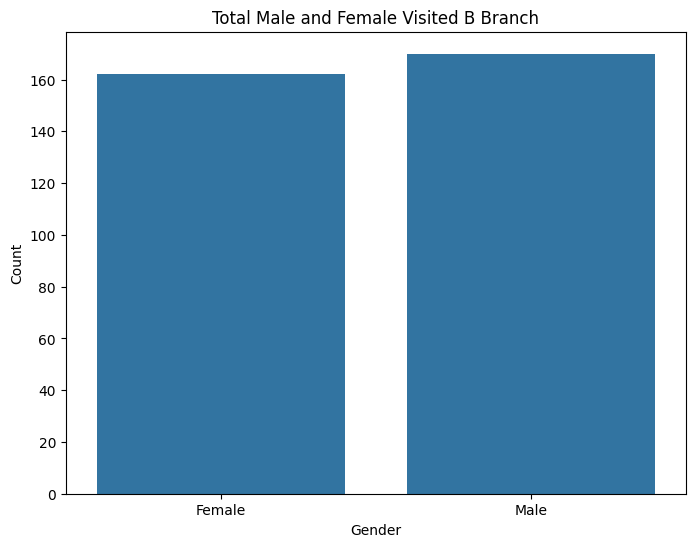

Gender counts for branch B:
Gender
Male      170
Female    162
Name: count, dtype: int64
--------------------


In [14]:
# prompt: Give me count for total male and female branchwise indata

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('/supermarket_sales - Sheet1.csv')
except FileNotFoundError:
    print("Error: '/supermarket_sales - Sheet1.csv' not found. Please ensure the file exists in the specified path.")
    df = pd.DataFrame()

if not df.empty:
    for branch in df['Branch'].unique():
        branch_df = df[df['Branch'] == branch]
        plt.figure(figsize=(8, 6))
        sns.countplot(x='Gender', data=branch_df)
        plt.title(f'Total Male and Female Visited {branch} Branch')
        plt.xlabel('Gender')
        plt.ylabel('Count')
        plt.show()
        gender_counts = branch_df['Gender'].value_counts()
        print(f"Gender counts for branch {branch}:")
        print(gender_counts)
        print("-" * 20)

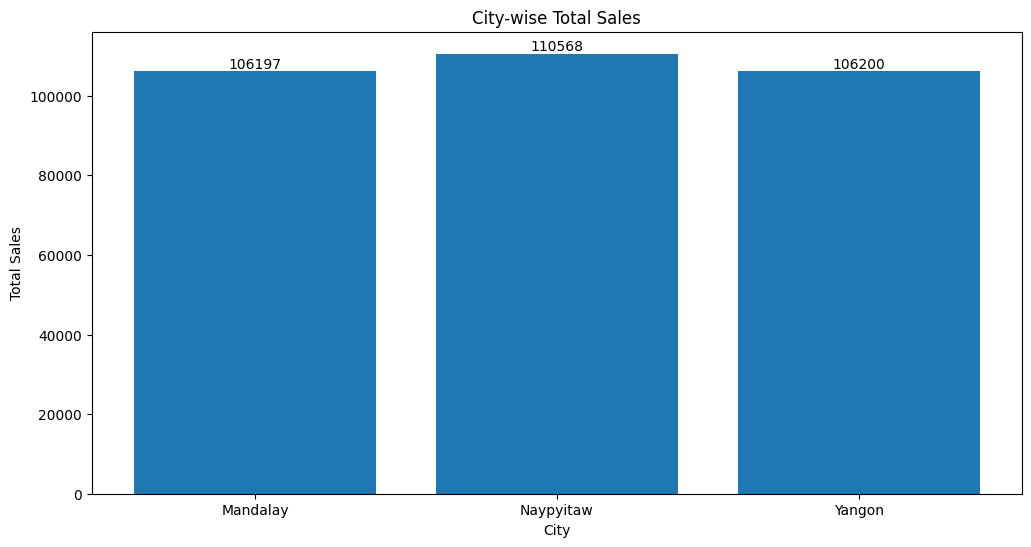

In [16]:
# prompt: City wise sale chart plot as per the data which chart is suitable give datalabel to graph

import matplotlib.pyplot as plt

if not df.empty:
    city_sales = df.groupby('City')['Total'].sum()

    plt.figure(figsize=(12, 6))
    bars = plt.bar(city_sales.index, city_sales.values)
    plt.xlabel("City")
    plt.ylabel("Total Sales")
    plt.title("City-wise Total Sales")

    # Add data labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
    plt.show()

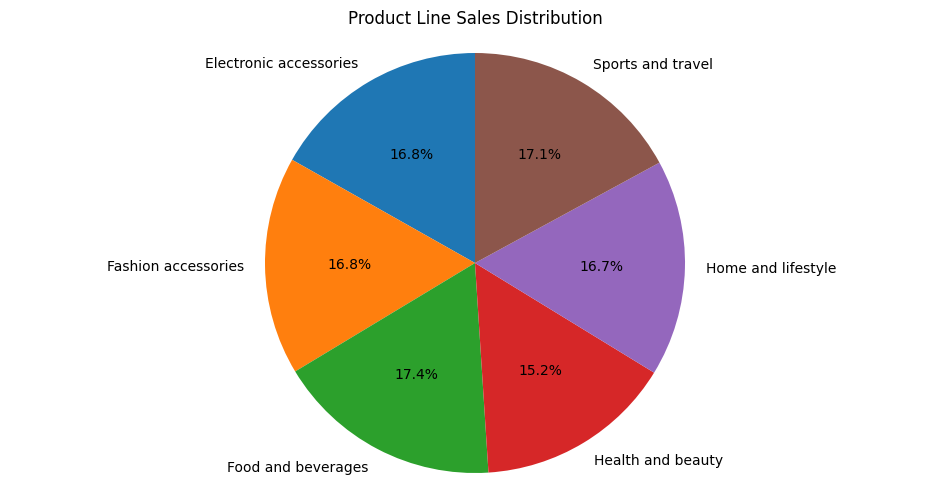

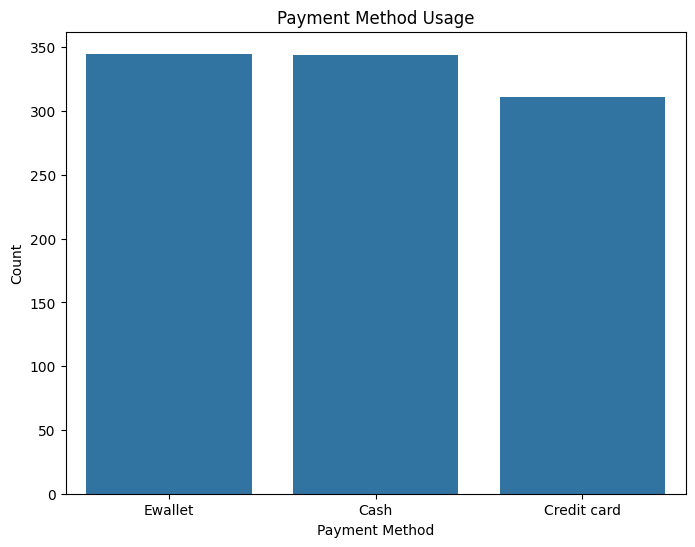

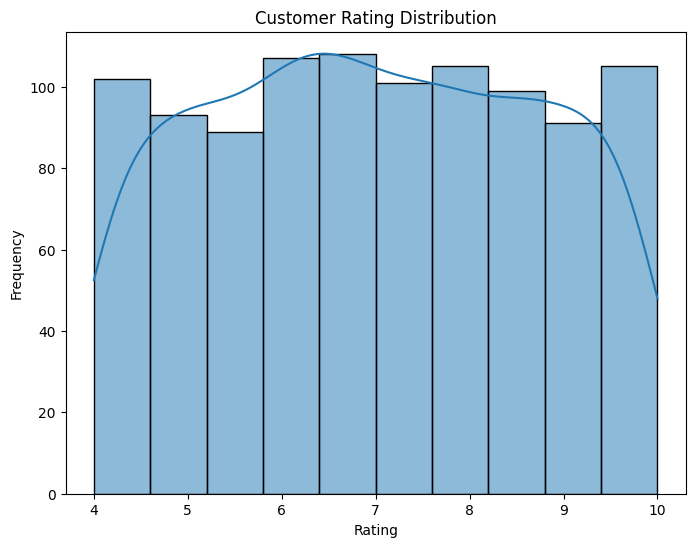

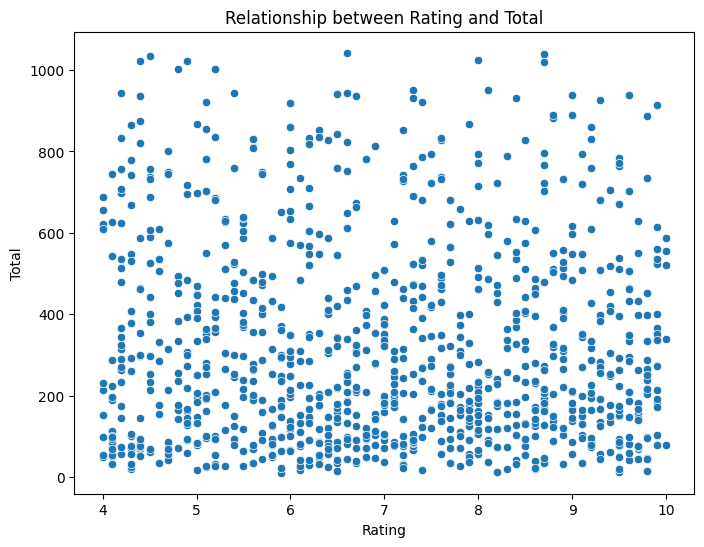

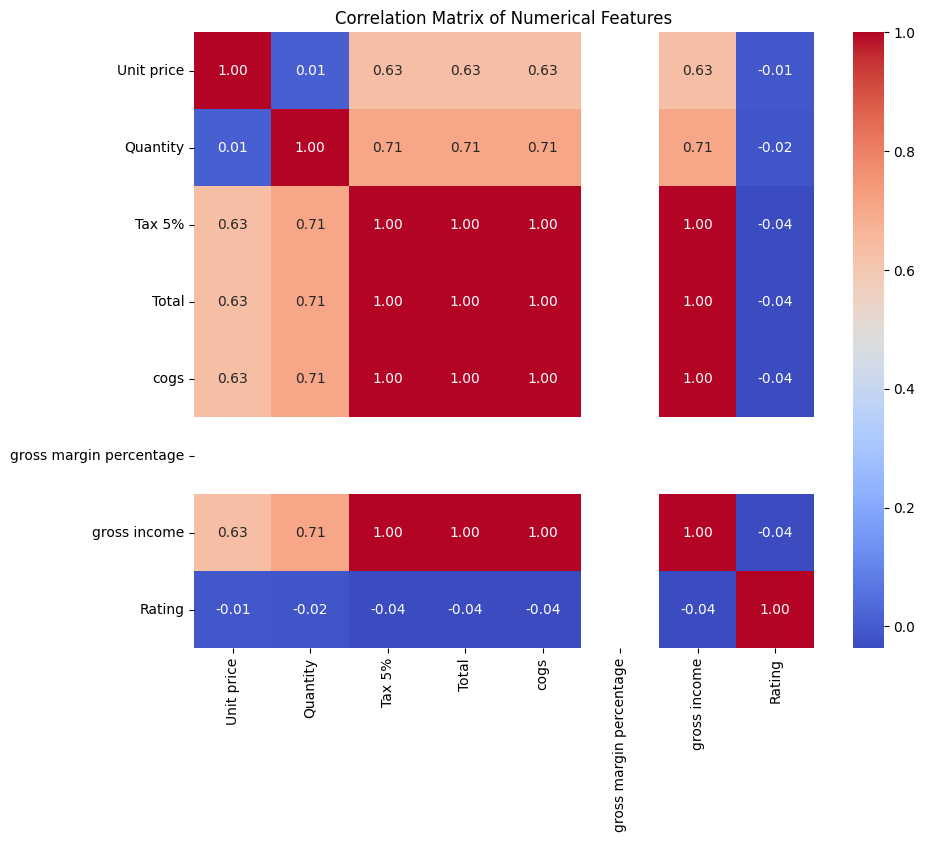

In [17]:
# prompt: Create the overall analysis with different scenario for the super market data

if not df.empty:
    # Analyze sales trends over time (assuming you have a date or time column)
    # If you have a 'Date' column, uncomment and modify the following lines
    # df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime if necessary
    # df['Month'] = df['Date'].dt.month # Extract month
    # monthly_sales = df.groupby('Month')['Total'].sum()
    # plt.figure(figsize=(10, 6))
    # plt.plot(monthly_sales.index, monthly_sales.values)
    # plt.xlabel("Month")
    # plt.ylabel("Total Sales")
    # plt.title("Monthly Sales Trend")
    # plt.show()


    # Analyze product performance
    product_sales = df.groupby('Product line')['Total'].sum()
    plt.figure(figsize=(12, 6))
    plt.pie(product_sales, labels=product_sales.index, autopct='%1.1f%%', startangle=90)
    plt.title("Product Line Sales Distribution")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()


    # Analyze payment methods
    payment_method_counts = df['Payment'].value_counts()
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Payment', data=df)
    plt.title('Payment Method Usage')
    plt.xlabel('Payment Method')
    plt.ylabel('Count')
    plt.show()

    # Analyze customer ratings
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Rating'], bins=10, kde=True)  # Histogram with kernel density estimate
    plt.title('Customer Rating Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()

    # Analyze the relationship between rating and total
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Rating', y='Total', data=df)
    plt.title('Relationship between Rating and Total')
    plt.xlabel('Rating')
    plt.ylabel('Total')
    plt.show()

    # Correlation matrix to see relationships between numerical variables
    numerical_cols = df.select_dtypes(include=np.number).columns
    correlation_matrix = df[numerical_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

In [32]:
# prompt: Create the web view for the above analysis make the dashboard

import ipywidgets as widgets
from IPython.display import display, clear_output

# Assuming your analysis code generates plots and prints results as in the provided code.

# Create output widget to display results
output = widgets.Output()

# Create a dropdown for plot selection
plot_options = {
    'Gender Distribution per Branch': 1,
    'City-wise Total Sales': 2,
    'Product Line Sales Distribution': 3,
    'Payment Method Usage': 4,
    'Customer Rating Distribution': 5,
    'Relationship between Rating and Total': 6,
    'Correlation Matrix of Numerical Features': 7
    # Add other plots here...
}
plot_dropdown = widgets.Dropdown(
    options=plot_options.keys(),
    description='Select Plot:',
    value=list(plot_options.keys())[0] #set default value
)


# Function to update the output based on the dropdown selection
def update_plot(change):
    with output:
        clear_output()
        selected_plot = change.new
        if selected_plot == 'Gender Distribution per Branch':
            # Your existing code to generate Gender Distribution plot
            if not df.empty:
                for branch in df['Branch'].unique():
                    branch_df = df[df['Branch'] == branch]
                    plt.figure(figsize=(8, 6))
                    sns.countplot(x='Gender', data=branch_df)
                    plt.title(f'Total Male and Female Visited {branch} Branch')
                    plt.xlabel('Gender')
                    plt.ylabel('Count')
                    plt.show()
                    gender_counts = branch_df['Gender'].value_counts()
                    print(f"Gender counts for branch {branch}:")
                    print(gender_counts)
                    print("-" * 20)
        elif selected_plot == 'City-wise Total Sales':
            # Your existing code to generate City-wise Total Sales plot
            if not df.empty:
              city_sales = df.groupby('City')['Total'].sum()

              plt.figure(figsize=(12, 6))
              bars = plt.bar(city_sales.index, city_sales.values)
              plt.xlabel("City")
              plt.ylabel("Total Sales")
              plt.title("City-wise Total Sales")

              # Add data labels on top of each bar
              for bar in bars:
                  yval = bar.get_height()
                  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
              plt.show()

        # Add elif blocks for other plots...
        elif selected_plot == 'Product Line Sales Distribution':
            # Existing code for the product sales pie chart
            if not df.empty:
                product_sales = df.groupby('Product line')['Total'].sum()
                plt.figure(figsize=(12, 6))
                plt.pie(product_sales, labels=product_sales.index, autopct='%1.1f%%', startangle=90)
                plt.title("Product Line Sales Distribution")
                plt.axis('equal')
                plt.show()
        # ...add more elif blocks for other plots...


# Link the dropdown to the update function
plot_dropdown.observe(update_plot, names='value')

# Display the dropdown and the output widget
display(plot_dropdown)
display(output)


Dropdown(description='Select Plot:', options=('Gender Distribution per Branch', 'City-wise Total Sales', 'Prod…

Output()